You will first need to take steps to check for missing dates:

Convert the dates to a month format (these are US dates, so the format is MM/DD/YYYY).
Extract the month to a new column.

In [ ]:
import pandas as pd
pumpkins = pd.read_csv('../data/US-pumpkins.csv')
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [5]:
pumpkins.isnull().sum()
# There is missing data, but maybe it won't matter for the task at hand.

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

To make your dataframe easier to work with, select only the columns you need, using the loc function which extracts from the original dataframe a group of rows (passed as first parameter) and columns (passed as second parameter). The expression : in the case below means "all rows".

In [6]:
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

Second, determine average price of pumpkin
Think about how to determine the average price of a pumpkin in a given month. What columns would you pick for this task? Hint: you'll need 3 columns.

Solution: take the average of the Low Price and High Price columns to populate the new Price column, and convert the Date column to only show the month. Fortunately, according to the check above, there is no missing data for dates or prices.

In [7]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})

But wait! There's something odd here
If you look at the Package column, pumpkins are sold in many different configurations. Some are sold in '1 1/9 bushel' measures, and some in '1/2 bushel' measures, some per pumpkin, some per pound, and some in big boxes with varying widths.

Pumpkins seem very hard to weigh consistently
Digging into the original data, it's interesting that anything with Unit of Sale equalling 'EACH' or 'PER BIN' also have the Package type per inch, per bin, or 'each'. Pumpkins seem to be very hard to weigh consistently, so let's filter them by selecting only pumpkins with the string 'bushel' in their Package column.

In [ ]:
# Add a filter at the top of the file, under the initial .csv import:
# pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
# If you print the data now, you can see that you are only getting the 415 or so rows of data containing pumpkins by the bushel.

But wait! There's one more thing to do
Did you notice that the bushel amount varies per row? You need to normalize the pricing so that you show the pricing per bushel, so do some math to standardize it.

In [11]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

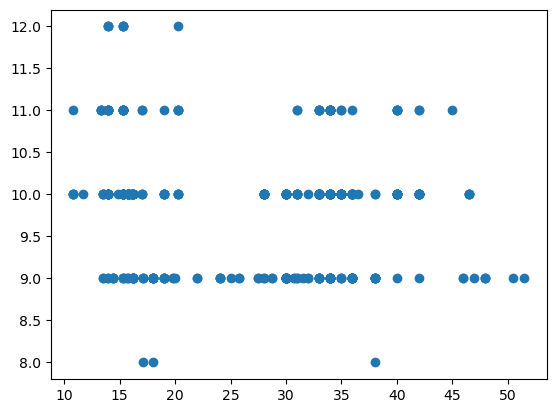

In [14]:
import matplotlib.pyplot as plt
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

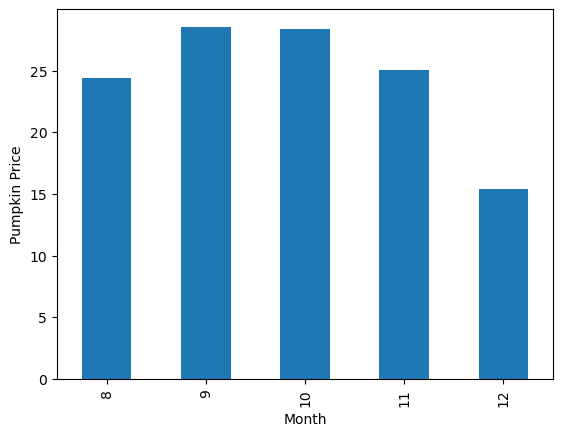

In [15]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

Explore the different types of visualization that Matplotlib offers. Which types are most appropriate for regression problems?